![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Computer Lab: Emittance Dilution
##### Author: E. Harms, N. Neveu

This worksheet demonstrates emittance issues related to matching.  
Questions to be answered and turned in for grade are typeset in **Bold** Type.

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- Repeated variables are appeneded with a number (1,2,3) indicating the section they belong to.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column
----------

## 1. Emittance Issues

Large accelerator complexes often are composed of a chain of machines with ever-increasing final energies. It can be challenging to efficiently transfer beams from one accelerator to another while preserving the emittance. Mismatches in the $\beta$-function, steering errors, and thin foils used to isolate vacuum between one ring and another, for example, can all be sources of emittance dilution (growth). In this exercise we look at the effect each of these can have on our particle beam.

In the cells below, inputting an injection offset, $\Delta x$ (dx), or a beta function mismatch, $r_{\beta}$ (r_beta) and looking at the behavior of N particles, 1000 for this case, over a certain number of turns, Nt, we can evaluate the emittance growth.


The first plot below displays the phase space distribution of the N particles after Nt turns. The y-axis plots $p_x = \beta x' +\alpha x$, and the x-axis simply displays x. The other graph displays a histogram of the particle distribution in x. Also shown are the mean value and standard deviation for x. Calculated values of the emittance increase, predicted steering mismatch, and amplitude function mismatch are found at the bottom.

Let’s begin with baseline (ideal) conditions: for $\delta x =0$ (no position offset), $r_{\beta}=1$ (no beta function mismatch). For Nturns = 0 record: mean xf, stdex (xf), Emittance increase, Steering Mismatch, and Amplitude function mismatch below.

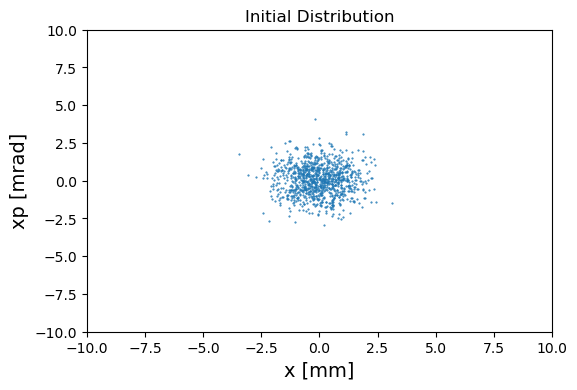

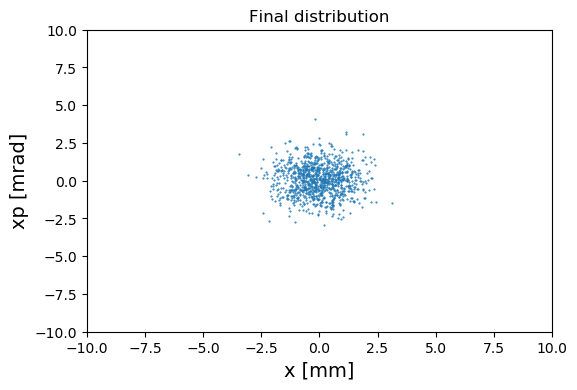

mean of xf -0.04422949729805986
stdev of xf 0.9682618892718572
stdev^2 of xf 0.9375310862163062
steering mismatch 1.0
Amplitude mismatch 1.0


In [43]:
import numpy as np

nu_0 = 0.288762 # Small amplitude tune
dnu  = 0.002    # Change in tune

dx     = 0.0 # injection displacement error (units of sigma), initial = 0.0
r_beta = 1.0 # injection focusing error (aspect ratio), initial = 1.0

#Tracking n Particles
N       = 1000      #number of particles: initial = 1000
Nturns  = 0         #number of turns to track: initial = 0

# Creating distribution of particles based on normal distribution
x = np.random.normal(0, np.sqrt(r_beta), N) + dx
p = np.random.normal(0, 1/np.sqrt(r_beta), N) 

# Creating empty data arrays to be filled later 
xf = np.zeros((N))
pf = np.zeros((N))

# x final and p final 
ri    = np.sqrt(x**2+p**2)  # Calculating r
nu_r  = nu_0 + dnu*ri**2          # Tune dependence on amplitude 

# x final 
xf = np.cos(np.deg2rad(Nturns*2*np.pi*nu_r))*x + np.sin(np.deg2rad(Nturns*2*np.pi*nu_r))*p
# p final 
pf = -np.sin(np.deg2rad(Nturns*2*np.pi*nu_r))*x + np.cos(np.deg2rad(Nturns*2*np.pi*nu_r))*p
    
# importing plotting library    
import matplotlib
from matplotlib import pyplot as plt
#Setting resolution of plot (changes size too)
matplotlib.rcParams['figure.dpi'] = 100 #initial = 100, Increase number for bigger plots

# Plotting the data
plt.figure(1)
plt.plot(x,p, '.', markersize=1)
plt.title('Initial Distribution')
plt.xlabel('x [mm]', size=14)
plt.ylabel('xp [mrad]', size=14)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

plt.figure(2)
plt.title('Final distribution')
plt.plot(xf, pf, '.', markersize=1)
plt.xlabel('x [mm]', size=14)
plt.ylabel('xp [mrad]', size=14)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

print('mean of xf', np.mean(xf))
print('stdev of xf', np.std(xf))
print('stdev^2 of xf', np.std(xf)**2)
print('steering mismatch', 1+0.5*dx**2)
dbeta = r_beta -1
print('Amplitude mismatch', 1+0.5*(dbeta**2/(1+dbeta)))

**Q1) Set Nturns = 100. How do the ‘mean(xf)’, ‘stdev(xf)’, ‘Emittance Increase’, and the predicted values of ‘Steering Mismatch’, and ‘Amplitude function Mismatch’ compare with the Nturns = 0 case?**

| Value              | Nturn = 0 | Nturn = 100          | 
|--------------------|-----------|----------------------|
| mean($x_f$)        | .....     |   ... | 
| stdev($x_f$)       | .....     |   ... | 
| Emittance Increase | .....     |   ... | 
| Steering Mismatch  | .....     |   ... | 
| Amplitude Mismatch | .....     |   ... | 

----

Return Nturns to 0. We will now analyze the effect of a steering (displacement) error. Set $\Delta x$ (sigma).